In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, Y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [15]:
estimator = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5)

In [16]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.941 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             verbose=5)

In [17]:
estimator.best_estimator_

SVC(C=0.01, kernel='linear')

In [18]:
model = estimator.best_estimator_

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [21]:
confusion_matrix(y_test, y_pred)

array([[48,  5],
       [ 1, 89]])

In [22]:
accuracy_score(y_test, y_pred)

0.958041958041958

In [23]:
f1_score(y_test, y_pred)

0.967391304347826

In [24]:
y_train_pred = model.predict(X_train)

In [25]:
confusion_matrix(y_train, y_train_pred)

array([[151,   8],
       [  0, 267]])

In [26]:
accuracy_score(y_train, y_train_pred)

0.9812206572769953

In [27]:
f1_score(y_train, y_train_pred)

0.985239852398524

In [28]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [29]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [30]:
y = f(X[:,0], X[:, 1])

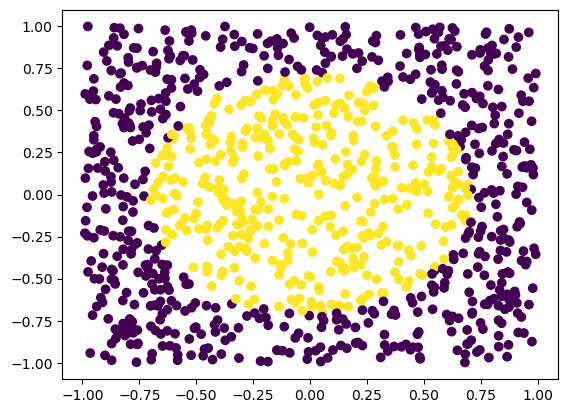

In [31]:
plt.scatter(X[:,0], X[:,1], c=y)

In [32]:
model = SVC(kernel='linear')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_train_pred = model.predict(X_train)

In [36]:
accuracy_score(y_train, y_train_pred)

0.6186666666666667

In [37]:
y_test_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_test_pred)

0.62

In [39]:
model = SVC(kernel='rbf')

In [40]:
model.fit(X_train, y_train)

SVC()

In [41]:
y_train_pred = model.predict(X_train)

In [42]:
accuracy_score(y_train, y_train_pred)

0.98

In [43]:
y_test_pred = model.predict(X_test)

In [44]:
accuracy_score(y_test, y_test_pred)

0.968

In [45]:
print(f'Broj potpornih vektora: {model.n_support_}')

Broj potpornih vektora: [88 84]


In [46]:
print(f'Indeksi instanci koji su potporni vektori: {model.support_}')

Indeksi instanci koji su potporni vektori: [  9  13  22  27  44  50  76  79  95  98 107 130 131 145 149 163 166 171
 199 226 227 232 243 257 259 260 261 264 271 294 304 307 312 315 321 322
 326 348 358 360 363 373 384 391 395 404 405 412 423 429 439 443 449 460
 471 475 493 496 499 510 511 518 528 541 542 551 561 562 568 575 583 590
 600 605 612 630 632 634 639 651 656 657 668 682 687 717 734 748  20  26
  37  54  58  72  90  97 112 117 126 129 134 139 148 160 161 164 167 181
 182 186 202 205 206 214 223 235 253 255 269 270 301 305 306 310 311 340
 343 362 375 376 379 382 385 390 414 424 428 431 436 446 448 451 484 505
 508 527 531 533 535 538 558 569 571 599 603 610 620 631 645 650 655 662
 681 713 722 726 730 732 735 737 738 746]


In [47]:
print(f'Sami potporni vektori: {model.support_vectors_}')

Sami potporni vektori: [[ 0.75589788 -0.19062135]
 [-0.7773039  -0.03761346]
 [ 0.60336175 -0.47382761]
 [-0.22231704 -0.73551379]
 [-0.19375536 -0.7309469 ]
 [ 0.53521477 -0.53890346]
 [-0.68202279 -0.38249717]
 [-0.70423595  0.27342414]
 [ 0.32712151  0.63917764]
 [-0.65210875 -0.30124188]
 [ 0.69629177 -0.23279504]
 [ 0.28273972 -0.7086557 ]
 [-0.6269385  -0.41937539]
 [ 0.23021315 -0.68701374]
 [ 0.27421749 -0.6908047 ]
 [-0.27704389 -0.72157832]
 [ 0.63033446 -0.35882982]
 [-0.72433262  0.13727357]
 [ 0.69975337 -0.22102416]
 [-0.65731006  0.50628821]
 [ 0.72697083  0.15649743]
 [ 0.64986935  0.34816841]
 [-0.55522385 -0.49139372]
 [ 0.31641335  0.67337558]
 [ 0.15955855 -0.76936037]
 [ 0.05391544  0.72363353]
 [ 0.05265305 -0.72607629]
 [ 0.05999852 -0.74907599]
 [ 0.76728087  0.0101367 ]
 [ 0.6859591   0.21836602]
 [ 0.02909268  0.73964497]
 [-0.18378469 -0.7766783 ]
 [ 0.06754013  0.78004058]
 [-0.71030949 -0.32423649]
 [-0.5370805   0.62649761]
 [-0.36581629  0.66677129]
 [ 0.

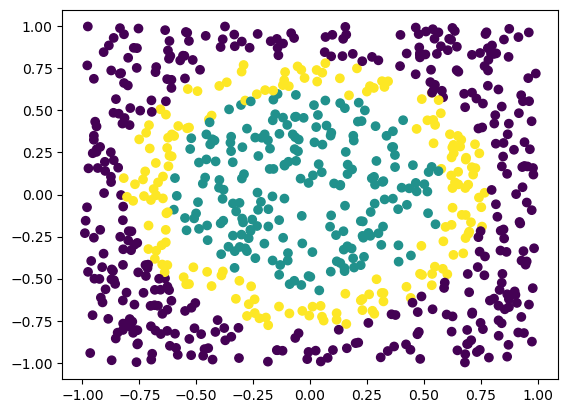

In [49]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()